/tmp/ipykernel_67193/3152032658.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator.load_state_dict(torch.load('generator.pth'))


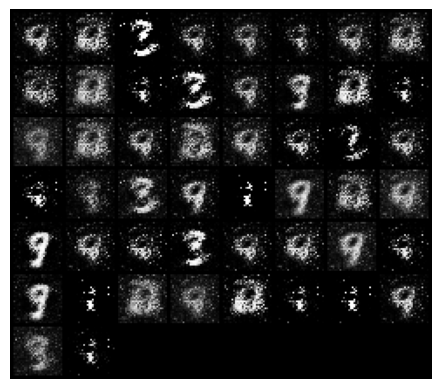

In [6]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils

# Define the Generator class (same as before)
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, image_size),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)
latent_dim = 100
image_size = 28 * 28
# Load the trained generator model
generator = Generator()
generator.load_state_dict(torch.load('generator.pth'))
generator.eval()

# Generate images
def generate_images(num_images):
    z = torch.randn(num_images, latent_dim)
    with torch.no_grad():
        generated_images = generator(z).view(num_images, 1, 28, 28)
    return generated_images

# Save or display the images
def save_images(images, path='generated_images.png'):
    grid = np.transpose(torchvision.utils.make_grid(images, nrow=8, normalize=True), (1, 2, 0))
    plt.imshow(grid)
    plt.axis('off')
    plt.savefig(path)
    plt.show()

# Generate and save 50 images
num_images = 50
generated_images = generate_images(num_images)
save_images(generated_images)

In [8]:
# Save images in a folder
import os
def save_images(images, folder='generated_images'):
    os.makedirs(folder, exist_ok=True)
    for i, img in enumerate(images):
        img = img.squeeze().cpu().numpy()
        plt.imsave(os.path.join(folder, f'image_{i+1}.png'), img, cmap='gray')

# Generate and save 50 images
num_images = 50
generated_images = generate_images(num_images)
save_images(generated_images)